# •	Board game review (Average Rating) prediction 

## Step 1: Frame the problem

- Objective: Predict the average rating a board game will receive based on certain aspects such as number of participants in game, difficulty, playing time etc.
		
- In current world we have access to wide variety of products from many possible domains. Be it shopping, watching movies or playing games we can do all these things online. With ability for consumer to share his/her reviews about the product or service he/she receives has made massive influence on shopping behaviours of consumers.

- Products with very good rating high chances of ranking higher up in the Top product list. Having many positive reviews about product will give boost to the sell of product by attracting new consumers. Postive reviews gives customer a trust about quality of the product. But on same line, few negative reviews will repel the consumer from product. The major benifit of review or rating system can be seen on decline in malfunctioning.

- On BoradGameGeek website, from where the data has been collected for this problem, ratings of games plays very crucial role in attracting new players towards those high rated game. The rating of games are on scale of 1 to 10 with 1 being 'Awful' and 10 being 'Outstanding'. For more information about the ratings, visit https://boardgamegeek.com/wiki/page/Ratings&redirectedfrom=rating#


- Data Description:
There are total 20 features columns for each game.
Following are the features associated with each game:
    - type: Type of game
    - name: Name of game
    - yearpublished: Year when game is published
    - minplayers & maxplayers: Minimum and maximum number of players allowed to particiate in the game
    - playingtime: Allowed playing time (maximum)
    - minplayingtime & maxplayingtime: Minimum and maximum allowed playing time
    - minage: Minimum age of player required to play
    - users_rated: Total number of users given rating to the game
    - average_rating: Avergae rating for game
    - bayes_average_rating: Bayesian average rating for game
    - total_owners: Total number of players who own this game
    - total_traders: Total number of players who want to trade this game
    - total_wanters: Total number of players who wants this game in trade
    - total_wishers: Total number of players who added this game in their wishlist
    - total_comments: Total number of comments
    - total_weights: Total number of people given Game Play Weight to this game
    - average_weight: Average weight of this game

Important Terms:
- Rating: range 1-10. For more info: https://boardgamegeek.com/wiki/page/Ratings&redirectedfrom=rating#
- Game Play Weight: range 1-5. Community rating for how difficult a game is to understand. Lower rating (lighter weight) means easier. For more info: https://boardgamegeek.com/wiki/page/Weight

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('../input/board-games-prediction-data/games.csv')
print(data.shape)
data.head()

(81312, 20)


,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


## Step 2: Data Exploration

In [ ]:
data_explore = data.copy()

- Average ratings for game will never be relied on id, type and name of game. So we will drop this column from dataset.
- Bayes average rating is another form of rating which is used to ensure that highly rated minority interest games are ranked lower than highly rated mass interest games. We should not use this column for making predictions.

In [ ]:
drop_features = ['id', 'type', 'name', 'bayes_average_rating']
data_explore = data_explore.drop(columns=drop_features, axis=1)

In [ ]:
data_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearpublished   81309 non-null  float64
 1   minplayers      81309 non-null  float64
 2   maxplayers      81309 non-null  float64
 3   playingtime     81309 non-null  float64
 4   minplaytime     81309 non-null  float64
 5   maxplaytime     81309 non-null  float64
 6   minage          81309 non-null  float64
 7   users_rated     81312 non-null  int64  
 8   average_rating  81312 non-null  float64
 9   total_owners    81312 non-null  int64  
 10  total_traders   81312 non-null  int64  
 11  total_wanters   81312 non-null  int64  
 12  total_wishers   81312 non-null  int64  
 13  total_comments  81312 non-null  int64  
 14  total_weights   81312 non-null  int64  
 15  average_weight  81312 non-null  float64
dtypes: float64(9), int64(7)
memory usage: 9.9 MB


- Following columns contain null values: yearpublished, minplayers, maxplayers, playingtime, minplaytime, maxplaytime, minage

In [ ]:
data_explore.describe()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


- Observations:
    - Minimum value of average rating and average weight is zero which is invalid as per the information given on BGG website. The expected minimum value for both these features should be 1. 
    - Minimum value in yearpublished column is negative indicating there are games with invalid value of published year.
    - Minimum value in users_rated column indicates that there are games for which no user has given rating.
    - Statistics of playingtime and maxplaytime columns are same. These are identical columns.
    - There are games with zero maximum playing time, zero minimum and/or maximum players required. These can be consider as invalid records.
    - There is no categorical feature present in this dataset.
    - By comparing max and 75% values of columns such as maxplaytime, minplaytime, users_rated maxplayers, minplayers etc. which tells us there are some outliers present in the dataset.
    
Let first focus on average rating.

In [ ]:
def plot_histogram(data):
    ax = plt.gca()
    counts, _, patches = ax.hist(data)
    for count, patch in zip(counts, patches):
        if count>0:
            ax.annotate(str(int(count)), xy=(patch.get_x(), patch.get_height()+5))
    if data.name:
        plt.xlabel(data.name)

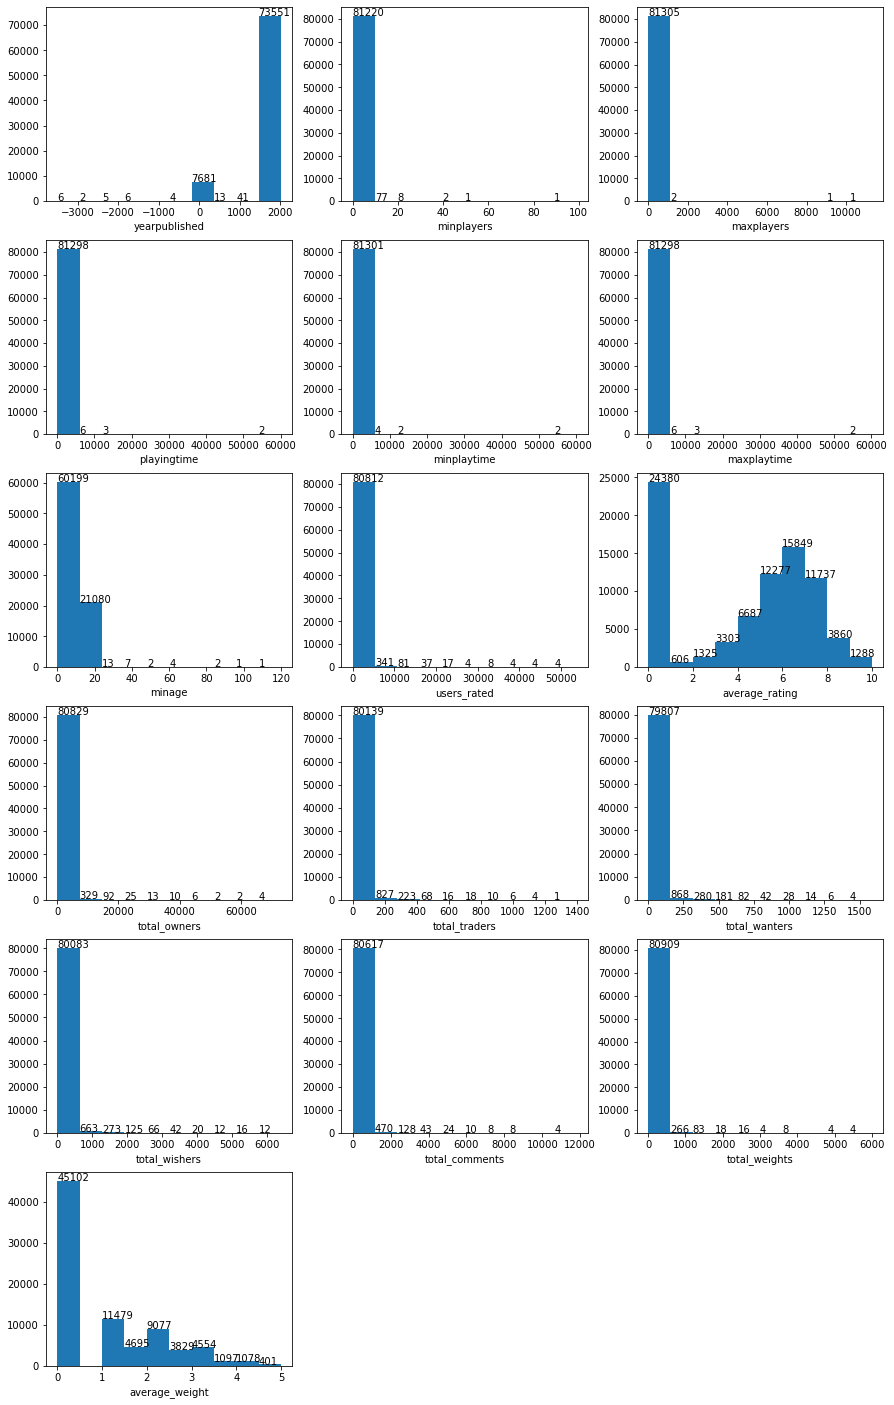

In [ ]:
plt.figure(figsize=(15, 25))
i=1
for col in data_explore.columns:
    plt.subplot(6, 3, i)
    plot_histogram(data_explore[col])
    i+=1

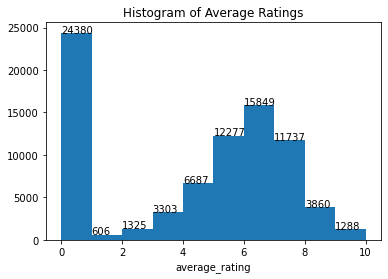

In [ ]:
plt.title('Histogram of Average Ratings')
plot_histogram(data_explore['average_rating'])

There are almost 24000 records with zero average ratings.  According to BoardGameGeek, the minimum rating any game can receive is 1. So definately the records of games with zero average rating are not going to any useful for us.

Lets explore more about these games with zero ratings.

In [ ]:
data_explore_zero_ratings = data_explore[data_explore['average_rating']==0]
data_explore_zero_ratings.describe()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,24379.000000,24379.000000,24379.000000,24379.000000,24379.000000,24379.000000,24379.000000,24380.0,24380.0,24380.000000,24380.000000,24380.000000,24380.000000,24380.000000,24380.000000,24380.000000
mean,1647.510357,1.961606,5.786948,32.313220,30.200008,32.313220,5.562205,0.0,0.0,1.516120,0.079368,0.307588,1.105209,0.230804,0.035439,0.064623
std,753.173533,1.194273,66.871729,111.860042,108.705701,111.860042,5.129236,0.0,0.0,2.809881,0.369331,1.685498,7.934577,0.693659,0.199406,0.394526
min,-2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1952.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1997.000000,2.000000,4.000000,20.000000,15.000000,20.000000,6.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,2.000000,6.000000,45.000000,30.000000,45.000000,10.000000,0.0,0.0,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2018.000000,99.000000,10000.000000,10000.000000,10000.000000,10000.000000,90.000000,0.0,0.0,87.000000,16.000000,72.000000,424.000000,28.000000,3.000000,5.000000


Above stats tells us that the game which receives zero average rating because there are no users who have given ratings to those games, there are hardly 1 to 2 users who owns or wants this game.

Lets get rid of those games with average rating equal to zero.

In [ ]:
data_explore = data_explore[data_explore['average_rating']>0]
data = data[data['average_rating']>0] # making this change in orignal dataframe

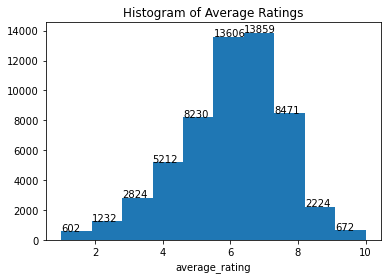

In [ ]:
plt.title('Histogram of Average Ratings')
plot_histogram(data_explore['average_rating'])

We also observe that there are games having average weight equal to zero. We should get rid of those records also.

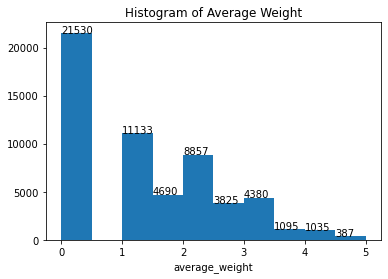

In [ ]:
plt.title('Histogram of Average Weight')
plot_histogram(data_explore['average_weight'])

In [ ]:
data_explore = data_explore[data_explore['average_weight']>0]
data = data[data['average_weight']>0] # making this change in orignal dataframe

We also saw that for some games 'year of published' is negative.

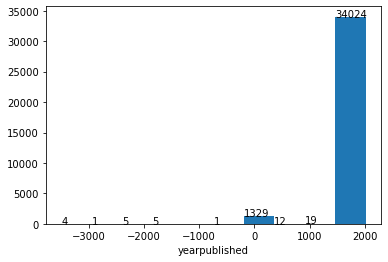

In [ ]:
plot_histogram(data_explore['yearpublished'])

We can see that for most of games, year of published is above 1500.

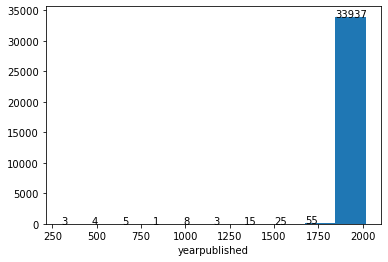

In [ ]:
data_explore = data_explore[data_explore['yearpublished']>0]
plot_histogram(data_explore['yearpublished'])

Again there not so many games prior to middle of 19th century. 

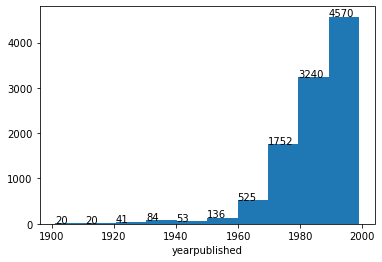

In [ ]:
data_explore_1920 = data_explore.query('yearpublished > 1900 and yearpublished < 2000')
plot_histogram(data_explore_1920['yearpublished'])

- For our problem, I will focus on the games which published after 1950. 
- Though dropping the records because they are very old in time might not be a good move. But I will prefer to have information about the time period in which board games were more popular and many peoples were playing them as the use of model we are going to build is has  to enable us to make better decisions about game new upcoming games.

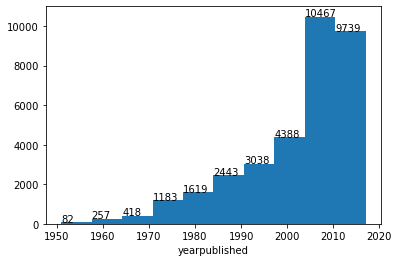

In [ ]:
data_explore = data_explore[data_explore['yearpublished']>1950]
data = data[data['yearpublished']>1950]
plot_histogram(data_explore['yearpublished'])

- It can be seen that the popularity of Board games started to rise in late 90's.
- Popularity of board games affects the quality, quantity, longevity and competitions among games. In my opinion these factors can influence the average rating of games. 

- Lets do the comparision of average rating between Board games published prior to 1985 where games are moderate to less popular and for games which pubilshed after 2000.

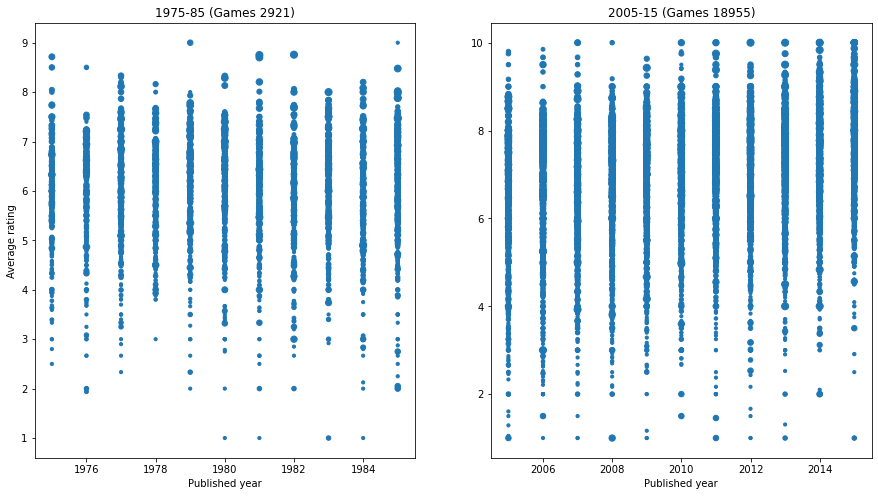

In [ ]:
data_7585 = data_explore.query('yearpublished >= 1975 and yearpublished <= 1985')
data_0515 = data_explore.query('yearpublished >= 2005 and yearpublished <= 2015')

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.scatter(data_7585['yearpublished'], data_7585['average_rating'], s=data_7585['average_weight']*10)
plt.title("1975-85 (Games {})".format(data_7585['yearpublished'].count()))
plt.xlabel('Published year')
plt.ylabel('Average rating')
plt.subplot(1, 2, 2)
plt.scatter(data_0515['yearpublished'], data_0515['average_rating'], s=data_0515['average_weight']*10)
plt.title("2005-15 (Games {})".format(data_0515['yearpublished'].count()))
plt.xlabel('Published year')
plt.show()

Have a look at both charts for rating above 7. There are many games in 2015 which has more than 8 ratings. There where hardly few games which receives average rating higher than 7. 

Note: The size of circle indicates the complexity of games. larger the size larger the complexity.

Moving on, One of the key observation we made earlier was that some of the columns contains outliers. Lets focus on some of those columns.

(-100.0, 500.0)

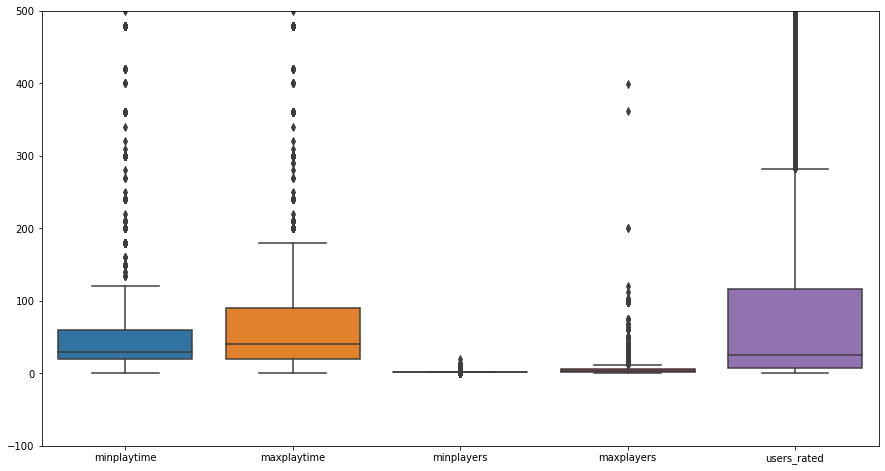

In [ ]:
columns = ['minplaytime', 'maxplaytime', 'minplayers', 'maxplayers', 'users_rated']
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_explore[columns])
plt.ylim(-100, 500)

- We can see there any outliers in each of above features. Lets calculate total number of outliers present in each feature column.

In [ ]:
Q1 = data_explore.quantile(0.25)
Q3 = data_explore.quantile(0.75)
IQR = Q3 - Q1
((data_explore < (Q1 - 1.5 * IQR)) | (data_explore > (Q3 + 1.5 * IQR))).sum()

yearpublished     1130
minplayers        9068
maxplayers         688
playingtime       1807
minplaytime       3115
maxplaytime       1807
minage              10
users_rated       5511
average_rating     774
total_owners      4928
total_traders     4637
total_wanters     4845
total_wishers     5306
total_comments    5218
total_weights     5257
average_weight     238
dtype: int64

- As we can see, each column has many outliers present. 
- Since the data is collected by using web-scrapping, there is possibility that the outliers can be the results of mistake made in data-collection process
- For now, we will not drop the outliers. Outliers not necessarily affect the models performance.
- Since there are outliers, we will replace the null values by median.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [ ]:
data_columns = data_explore.columns
data_explore = imputer.fit_transform(data_explore)
data_explore = pd.DataFrame(data=data_explore, columns=data_columns)

We also saw earlier that the playingtime column is same as maxplaying time. So we will drop the playingtime column.

In [ ]:
drop_features.append('playingtime')
data_explore = data_explore.drop(columns=['playingtime'], axis=1)

Now lets see how features are correlated with average rating. 

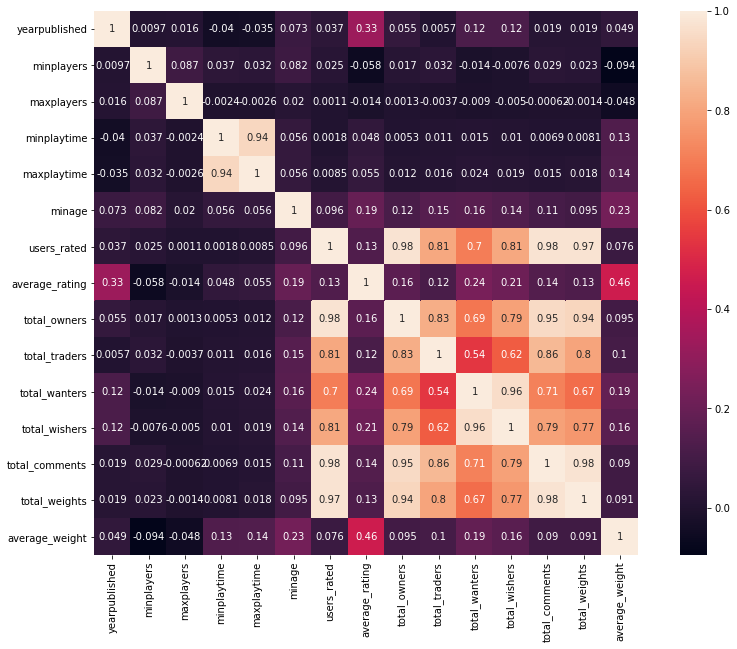

In [ ]:
plt.figure(figsize=(15, 10))
corr_matrix = data_explore.corr()
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), square=True, annot=True)

In [ ]:
corr_matrix['average_rating'].sort_values(ascending=False)

average_rating    1.000000
average_weight    0.460734
yearpublished     0.331925
total_wanters     0.242133
total_wishers     0.211757
minage            0.193503
total_owners      0.163320
total_comments    0.143107
users_rated       0.134443
total_weights     0.129105
total_traders     0.117117
maxplaytime       0.055231
minplaytime       0.047531
maxplayers       -0.013623
minplayers       -0.057946
Name: average_rating, dtype: float64

- Observations:
    - Average rating is correlated with complexity of game and year in which game was published. Average rating is less correlated with the number of users given rating to the game. I feel this less correlation is good indicator because the ratings should be more depend on what users think about game rather than how many users rate the game.
    - Average rating is more correlated with number of people who want the game in trade rather than number of people who owns the game. 
    - Rating of game is clearly independend of number of players and playing time of game.
    - From the correlation plot, we can see that there are many features having fairly strong correlation with other features.

## Step 3: Data Preprocessing

In [ ]:
data.shape

(33634, 20)

In orignal dataset we had more than 80000 records but because of many invalid values for some attributes we had to remove those records.

Lets now get ready with training and testing datasets.

In [ ]:
y = data[['average_rating']].copy()
X = data.drop(columns=['average_rating'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We are going to build a pipeline which will take care of the data cleaning and model training.

In data cleaning process we will focus on following aspects of data:
1. drop unnecessary features
2. replace null values
3. standardization of features

In [ ]:
feature_columns =[ feature for feature in list(X.columns) if feature not in drop_features ]

In [ ]:
from sklearn.compose import ColumnTransformer

drop_feature_cols = ColumnTransformer(transformers=[('drop_columns', 'drop', drop_features)], remainder='passthrough')

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
pre_process = Pipeline(steps=[('drop_features', drop_feature_cols),
                              ('imputer', SimpleImputer(strategy="median")),
                              ('scaler', StandardScaler())])

In [ ]:
X_train_transformed = pre_process.fit_transform(X_train)
X_test_transformed = pre_process.transform(X_test)

## Step 4: Select and Train a model

In data exploration step we found out two key facts about the dataset:
* Many features are correlated with each other.
* Many feature contains outliers.


- Having correlated features might affect performance of linear model but for tree-based models correlated feature is not a concern.
- I will use following machine learning algorithms:
    * Linear Regression
    * Decision Tree
    * Random Forest
   
   
- RMSE will the performance metric to evaluate model's performance.

In [ ]:
from sklearn.model_selection import cross_val_score

def cv_results(model, X, y):
    scores = cross_val_score(model, X, y, cv = 7, scoring="neg_mean_squared_error", n_jobs=-1)
    rmse_scores = np.sqrt(-scores)
    print('CV Scores: ', rmse_scores)
    print('rmse: {},  S.D.:{} '.format(np.mean(rmse_scores), np.std(rmse_scores)))

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train_transformed, y_train)

LinearRegression()

In [ ]:
coefs = list(zip(feature_columns, linear_reg.coef_[0]))
coefs.sort(key= lambda x:x[1], reverse=True)
coefs

[('total_owners', 0.6576882366241986),
 ('average_weight', 0.5126529732113667),
 ('total_comments', 0.4832520211840855),
 ('yearpublished', 0.37073992219430557),
 ('total_wanters', 0.34631752491016926),
 ('minage', 0.07519147370986894),
 ('maxplaytime', 0.033603915880423205),
 ('maxplayers', -0.0019632103727661703),
 ('minplayers', -0.026238267772323434),
 ('minplaytime', -0.03494261715412286),
 ('total_weights', -0.07194238297124059),
 ('total_traders', -0.17174770967771166),
 ('total_wishers', -0.28960523955095785),
 ('users_rated', -0.8042442110486802)]

We expect that the features which are strongly correlated with target variable to have high coefficient value compare to others.

Some interasting facts: 
- The model has given high weight to 'total_owners' feature than 'average_weight' and 'total_wanters'. Even though the latter two are more correlated with average rating than total_owners.
- Very less weight is given to 'users_rated' feature compare to other features like maxplaytime, minplaytime, etc.
    
This indicates Linear Regression gives much importance to number of people who owns the game rather than the people who wants this game in trade for prediction of average rating.

In [ ]:
print("Linear Regression Model Cross Validation Results")
cv_results(linear_reg, X_train_transformed, y_train)

Linear Regression Model Cross Validation Results
CV Scores:  [1.02706089 1.02270487 1.04810006 1.01816366 1.0549294  1.06746754
 1.03547664]
rmse: 1.0391290094549217,  S.D.:0.016909345373193923 


Variance of 2 in the prediciton of rating is not very good. 
Can we reduce the variance by reducing the correlation among feature variables.

Lets apply PCA technique to remove the correlation among input features.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)   # Keeping variance 95% so that we will not loose much information.
X_train_reduced = pca.fit_transform(X_train_transformed)
X_test_reduced = pca.transform(X_test_transformed)
pca.n_components_, X_train_reduced.shape[1]

(8, 8)

In [ ]:
linear_reg.fit(X_train_reduced, y_train)

LinearRegression()

In [ ]:
print("Linear Regression Model Cross Validation Results")
cv_results(linear_reg, X_train_reduced, y_train)

Linear Regression Model Cross Validation Results
CV Scores:  [1.04013529 1.03443327 1.05961725 1.02983227 1.07128507 1.07926553
 1.04580214]
rmse: 1.051481545531458,  S.D.:0.017528129501031994 


Unfortunately we didn't got any improvement in results. The only improvement we got is reduced in training time, which not our concern for this problem.

What effect the multicollinearity has on the model performance is well descibed on following link:
<br>https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features
<br>

- Few important learnings:
    - In case of supervised learning for predictions, the only reason for removing the multicollinearity is improve the training time and reduce the storage.
    - If we add so much correlated features to the model we may cause the model to consider unnecessary features and we may have curse of high dimensionality problem.
    - Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

Now lets shift our focus on tree-based models. We will first implement Decision tree and then see if we get any improvement in result by implementing Random Forest.

### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(criterion='mse', random_state=42)
tree_reg.fit(X_train_transformed, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
coefs = list(zip(feature_columns, tree_reg.feature_importances_))
coefs.sort(key= lambda x:x[1], reverse=True)
coefs

[('average_weight', 0.22537284549323108),
 ('yearpublished', 0.18664828188076868),
 ('total_owners', 0.08694781728850191),
 ('total_wanters', 0.07677285852993217),
 ('total_wishers', 0.06996944498428948),
 ('users_rated', 0.05717299009351274),
 ('total_comments', 0.04958228381917326),
 ('maxplayers', 0.049390042604165595),
 ('minage', 0.047507375837024614),
 ('total_traders', 0.043221988530391775),
 ('maxplaytime', 0.03414154922796625),
 ('minplaytime', 0.03218695047855731),
 ('total_weights', 0.021069206803395014),
 ('minplayers', 0.020016364429090085)]

- Decision Tree has given more importance to the total_wisher and yearpublished features than average_weight and total_wanters.
- This is completely different from what we recieved from Linear Regression. Linear Regressor model has given very less weights to total_wishers and yearpublished.
- This model has give more importance to total wishers and year in which game has been published.

In [ ]:
print("Decision Tree Regression Model Cross Validation Results")
cv_results(tree_reg, X_train_transformed, y_train)

Decision Tree Regression Model Cross Validation Results
CV Scores:  [1.23198988 1.26554687 1.29659923 1.25348246 1.25443881 1.31554695
 1.31003377]
rmse: 1.2753768528017415,  S.D.:0.029669493603739123 


This is even worse than Linear Regression. Lets see what we get from Random Forest.

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(criterion='mse', random_state=42, n_jobs=-1)
forest_reg.fit(X_train_transformed, y_train.values.flatten())

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
coefs = list(zip(feature_columns, forest_reg.feature_importances_))
coefs.sort(key= lambda x:x[1], reverse=True)
coefs

[('average_weight', 0.22818949303577196),
 ('yearpublished', 0.18972519738463842),
 ('total_owners', 0.0832583568673036),
 ('total_wishers', 0.07769288420010727),
 ('total_wanters', 0.07173358704614646),
 ('users_rated', 0.05802361026084752),
 ('total_comments', 0.04808680012568092),
 ('maxplayers', 0.04731882593137503),
 ('minage', 0.045669737106090395),
 ('total_traders', 0.044992224507481096),
 ('maxplaytime', 0.03168176685543045),
 ('minplaytime', 0.031498122544615384),
 ('total_weights', 0.022231486104823298),
 ('minplayers', 0.019897908029688098)]

In [ ]:
print("Random Forest Regression Model Cross Validation Results")
cv_results(forest_reg, X_train_transformed, y_train.values.flatten())

Random Forest Regression Model Cross Validation Results
CV Scores:  [0.87418532 0.90405801 0.89337311 0.87699087 0.88317166 0.9490283
 0.90549277]
rmse: 0.8980428636946934,  S.D.:0.023744251698571025 


Much better result. Now lets tune the Random Forest model to obtain best model which we can use as our final model.

## Step 5: Fine Tune a Model

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_parm=[{'n_estimators':[25, 50, 75, 100], 'max_depth':[4, 8, 12, 16]}]
grid_search = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), grid_parm, cv=5, scoring="neg_mean_squared_error", return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_transformed, y_train.values.flatten())

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'max_depth': [4, 8, 12, 16],
                          'n_estimators': [25, 50, 75, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
cvres = grid_search.cv_results_
print("Results for each run of Random Forest Regression...")
for train_mean_score, test_mean_score, params in zip(cvres["mean_train_score"], cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-train_mean_score), np.sqrt(-test_mean_score), params)

Results for each run of Random Forest Regression...
0.9758715413537408 0.9817814203817975 {'max_depth': 4, 'n_estimators': 25}
0.9755665131267356 0.9813034056981195 {'max_depth': 4, 'n_estimators': 50}
0.9752296363324573 0.9809430061888917 {'max_depth': 4, 'n_estimators': 75}
0.9750655022881299 0.980790400285451 {'max_depth': 4, 'n_estimators': 100}
0.8630246687410261 0.9253573272010367 {'max_depth': 8, 'n_estimators': 25}
0.861753946194949 0.9237655412614119 {'max_depth': 8, 'n_estimators': 50}
0.8613405890363531 0.9230654119860545 {'max_depth': 8, 'n_estimators': 75}
0.8609544422375149 0.9227212956986226 {'max_depth': 8, 'n_estimators': 100}
0.6717165690558268 0.9039957381345787 {'max_depth': 12, 'n_estimators': 25}
0.6673220725341659 0.8998782466034849 {'max_depth': 12, 'n_estimators': 50}
0.6663273740581338 0.8982962173511108 {'max_depth': 12, 'n_estimators': 75}
0.6652738543705128 0.8972253003432472 {'max_depth': 12, 'n_estimators': 100}
0.48305281358907676 0.9067101848025837 {'ma

In [ ]:
grid_search.best_params_, -grid_search.best_score_

({'max_depth': 16, 'n_estimators': 100}, 0.8004935067091024)

- If observe the train and test scores, There is not so much improvement in test score after parameter set {'max_depth': 12, 'n_estimators': 100}. On other side, RMSE is keep reducing as the max_depth is increasing. This indicates that if we continue to increase the max_depth model will start to overfit the training dataset.
- So I have decided to use model with parameters {'max_depth': 12, 'n_estimators': 100}. 

In [ ]:
best_forest_reg = grid_search.best_estimator_
best_forest_reg.max_depth=12
best_forest_reg

RandomForestRegressor(max_depth=12, n_jobs=-1, random_state=42)

## Step 6: Model Evaluation

In [ ]:
print("Best Random Forest Cross Validation Results")
cv_results(best_forest_reg, X_test_transformed, y_test)

Best Random Forest Cross Validation Results
CV Scores:  [0.91088247 0.86458168 0.88719952 0.8707708  0.88148208 0.87550818
 0.88089255]
rmse: 0.881616755178887,  S.D.:0.013801320292708726 


We also got much better RMSE on test dataset.